# Using hough techniques to find lines and circles
Here we learn how to use opencv's hough lines  

In [12]:
(ns opencv4.hough
  (:require
    [opencv4.utils :as u]
    [opencv4.colors.rgb :as color]
    [opencv4.core :refer :all]))

nil

Let's load the target image, and convert it to gray with a bit of blur, so that canny can work on it.

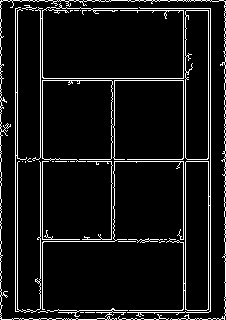

In [13]:
(def tennis 
  (-> "resources/chapter03/tennis_ground.jpg" 	imread ))
(def can  (-> 
            tennis 
            clone 
            (cvt-color! COLOR_BGR2GRAY) 
            (canny! 50.0 180.0 3 false)))
(u/>>> tennis)
(u/>>> can)

In [14]:
(def lines (new-mat))
(hough-lines can lines 1 (/ Math/PI 90) 100)

nil

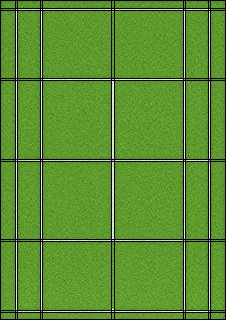

In [15]:
(def result (clone tennis))
(dotimes [ i (.rows lines)]
   (let [ val_ (.get lines i 0) 
          rho (nth val_ 0) 
          theta (nth val_ 1) 
          a (Math/cos theta)
          b (Math/sin theta)
          x0 (* a rho)
          y0 (* b rho)
          pt1 (new-point 
              (Math/round (+ x0 (* 1000 (* -1 b)))) 
              (Math/round (+ y0 (* 1000 a))))
          pt2 (new-point 
              (Math/round (- x0 (* 1000 (* -1 b)))) 
              (Math/round (- y0 (* 1000 a))))       
     ]
  (line result pt1 pt2 color/black 1)))

(u/>>> result)

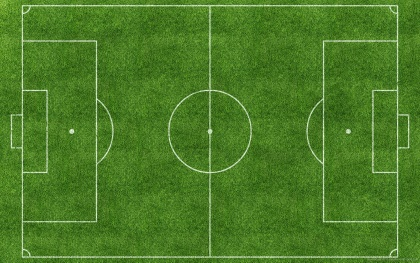

In [16]:
(def soccer-field (-> "resources/chapter03/soccer-field.jpg" (imread IMREAD_REDUCED_COLOR_4)))
(u/>>> soccer-field)

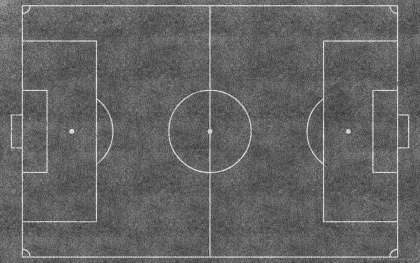

In [17]:
(def gray       
  (-> soccer-field 
      clone 
      (cvt-color! COLOR_BGR2GRAY) 
      (gaussian-blur! (new-size 1 1) 0 ) ))
(u/>>> gray)

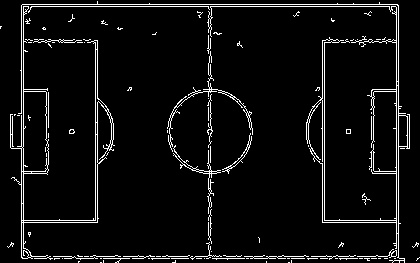

In [18]:
(def edges (-> gray clone (canny! 100 220 )))
(u/>>> edges)

Let's setup the parameters for the hough lines detection.

In [19]:
(def rho 1) ; distance resolution in pixels of the Hough grid
(def theta  (/ Math/PI 180)) ;   angular resolution in radians of the Hough grid
(def min-intersections 30) ;   minimum number of votes (intersections in Hough grid cell)
(def min-line-length  10) ;   minimum number of pixels making up a line
(def max-line-gap  50 ) ;  maximum gap in pixels between connectable line segments

(def lines (new-mat))
(hough-lines-p edges lines rho theta min-intersections min-line-length max-line-gap)

nil

Now that we have the lines, let's draw them on a clone of the original picture.

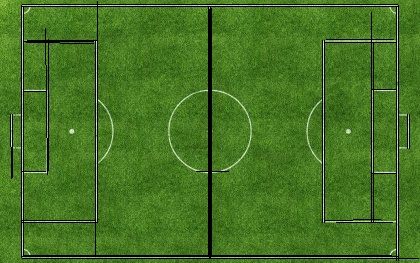

In [20]:
(def result (clone soccer-field))
(dotimes [ i (.rows lines)]
(let [ val (.get lines i 0)]
  (line result
    (new-point (nth val 0) (nth val 1))
    (new-point (nth val 2) (nth val 3))
    color/black
    1)))
(u/>>> result)

Finally, output all the intermediate images used in this guide. Let's not forget that hconcat and vconcat need all the pictures to be in the same format, in our case, the same number of channels. We convert back *gray* and *edges* with the proper number of channels.

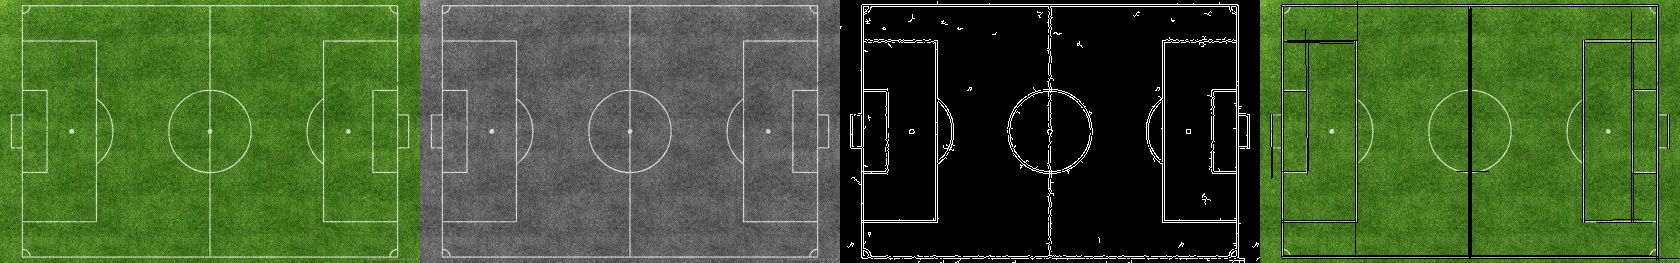

In [21]:
(u/>>> (hconcat! [
soccer-field 
  (-> gray clone (cvt-color! COLOR_GRAY2RGB))
  (-> edges clone (cvt-color! COLOR_GRAY2RGB))
  result] ))

_line-segment-detector has been removed from opencv so the code below does not run anymore._

_Let's stick with hough-lines-p for now_

In [24]:
;(def soccer-field 
; (-> "resources/chapter03/soccer-field.jpg" 
; (imread IMREAD_REDUCED_GRAYSCALE_4)))
;(def det (create-line-segment-detector))
;(def lines (new-mat))
;(def result (clone soccer-field))
;(.detect det soccer-field lines)
;(.drawSegments det result lines)
;lines
;(u/>>> result)

## Finding only pockets on a pool table

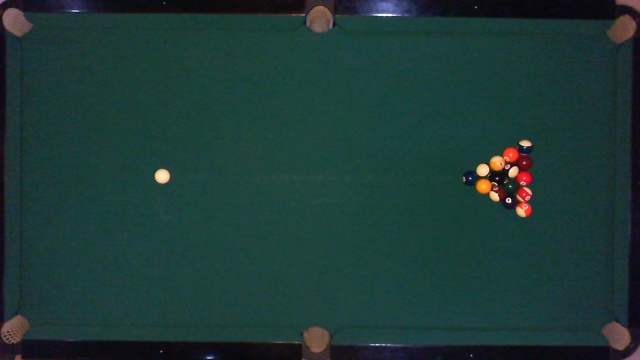

In [25]:
(def pool 
  (-> 
    "resources/chapter03/pooltable.jpg" 
    (imread IMREAD_REDUCED_COLOR_2)))
(u/>>> pool)

In [26]:
(def gray (-> pool clone (cvt-color! COLOR_BGR2GRAY)))
(def minRadius 10)
(def maxRadius 18)
(def circles (new-mat))
(hough-circles gray circles CV_HOUGH_GRADIENT 1 minRadius 120 10 minRadius maxRadius)

nil

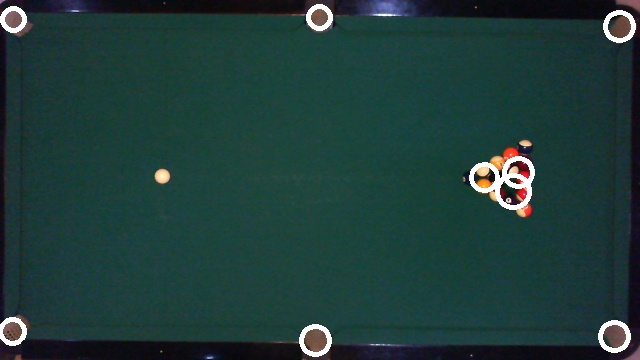

In [27]:
(def output (clone pool))
(dotimes [i (.cols circles)]
  (let [ _circle (.get circles 0 i) 
         x (nth _circle 0) 
         y (nth _circle 1) 
         r (nth _circle 2)  
         p (new-point x y)]
  (circle output p (int r) color/white 3)))
  
(u/>>> output)